In [17]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import operator
import pandas as pd

In [18]:
N = 8
dic = {}
counter = 0
for x in range(1,1+N):
    for y in range(1,1+N):
        counter +=1
        dic[counter,'x'] = x
        dic[counter,'y'] = y
dic

{(1, 'x'): 1,
 (1, 'y'): 1,
 (2, 'x'): 1,
 (2, 'y'): 2,
 (3, 'x'): 1,
 (3, 'y'): 3,
 (4, 'x'): 1,
 (4, 'y'): 4,
 (5, 'x'): 1,
 (5, 'y'): 5,
 (6, 'x'): 1,
 (6, 'y'): 6,
 (7, 'x'): 1,
 (7, 'y'): 7,
 (8, 'x'): 1,
 (8, 'y'): 8,
 (9, 'x'): 2,
 (9, 'y'): 1,
 (10, 'x'): 2,
 (10, 'y'): 2,
 (11, 'x'): 2,
 (11, 'y'): 3,
 (12, 'x'): 2,
 (12, 'y'): 4,
 (13, 'x'): 2,
 (13, 'y'): 5,
 (14, 'x'): 2,
 (14, 'y'): 6,
 (15, 'x'): 2,
 (15, 'y'): 7,
 (16, 'x'): 2,
 (16, 'y'): 8,
 (17, 'x'): 3,
 (17, 'y'): 1,
 (18, 'x'): 3,
 (18, 'y'): 2,
 (19, 'x'): 3,
 (19, 'y'): 3,
 (20, 'x'): 3,
 (20, 'y'): 4,
 (21, 'x'): 3,
 (21, 'y'): 5,
 (22, 'x'): 3,
 (22, 'y'): 6,
 (23, 'x'): 3,
 (23, 'y'): 7,
 (24, 'x'): 3,
 (24, 'y'): 8,
 (25, 'x'): 4,
 (25, 'y'): 1,
 (26, 'x'): 4,
 (26, 'y'): 2,
 (27, 'x'): 4,
 (27, 'y'): 3,
 (28, 'x'): 4,
 (28, 'y'): 4,
 (29, 'x'): 4,
 (29, 'y'): 5,
 (30, 'x'): 4,
 (30, 'y'): 6,
 (31, 'x'): 4,
 (31, 'y'): 7,
 (32, 'x'): 4,
 (32, 'y'): 8,
 (33, 'x'): 5,
 (33, 'y'): 1,
 (34, 'x'): 5,
 (34, 'y'): 2

In [19]:
n = N 
model = AbstractModel()

model.i = RangeSet(n)
model.j = Set(initialize = model.i)

model.attack_limit = Param(initialize = 0, mutable= True)

model.U = Var(model.i,model.j, within= Binary)

def rule_c1(model,i):
    return  sum(model.U[i,j] for j in model.j) <= 1
model.C1 = Constraint(model.i, rule=rule_c1)   


def rule_c2(model,j):
    return  sum(model.U[i,j] for i in model.i) <= 1
model.C2 = Constraint(model.i, rule=rule_c2) 

def rule_c3(model,i,j):
    return  sum(model.U[i,m] for m in model.j if j!=m) + sum(model.U[n,j] for n in model.i if i!=n) +  sum(model.U[n,m] for n in model.i for m in model.j if abs(m-j)==abs(n-i) and m!=j and n!=i )   <= model.attack_limit + (n**2)*(1-model.U[i,j]) 
model.C3 = Constraint(model.i,model.j, rule=rule_c3) 


def rule_c4(model,i,j):
    return sum(model.U[n,m] for n in model.i for m in model.j if (m-j)==(n-i) and m!=j and n!=i ) + model.U[i,j]  <= 1 
model.C4 = Constraint(model.i,model.j, rule=rule_c4)   
def rule_c5(model,i,j):
    return sum(model.U[n,m] for n in model.i for m in model.j if (m-j)==-(n-i) and m!=j and n!=i ) + model.U[i,j]  <= 1 
model.C5 = Constraint(model.i,model.j, rule=rule_c5)   


def rule_OF(model):
    return  sum(model.U[i,j] for j in model.j for i in model.i)
model.obj1 = Objective(rule=rule_OF, sense=maximize)
instance = model.create_instance()  


In [20]:
instance = model.create_instance()  
instance.C3.deactivate()
opt = SolverFactory('cbc')
results = opt.solve(instance) # solves and updates instance
from pyomo.opt import SolverStatus, TerminationCondition
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
     print ("this is feasible and optimal")
elif results.solver.termination_condition == TerminationCondition.infeasible:
     print ("do something about it? or exit?")
else:
     print ('ERROR ' + str(results.solver))
print(f"OF = {value(instance.obj1)} ")


this is feasible and optimal
OF = 8.0 


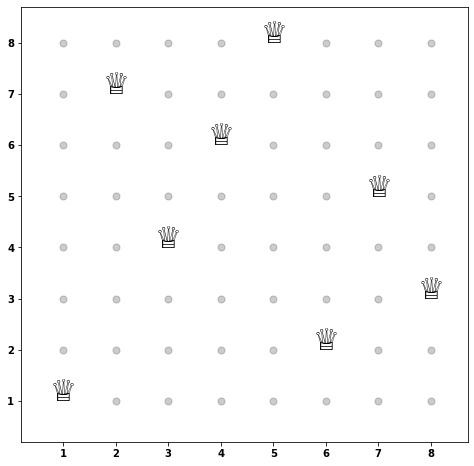

In [21]:
plt.figure(figsize=(8,8))
record_distance = {}
for j in instance.j:
    for i in instance.i:
        if value(instance.U[i,j]) >0:
            x, y = i, j 
            plt.scatter(x,y, s=0 , c='k')
            plt.text(x-0.25,y, s = '\u2655', fontsize=30 , c= 'k')
        else:
            x, y = i, j 
            plt.scatter(x,y, s=50 , c='k', alpha = 0.2)

plt.xlim(0.2, N+0.7)
plt.ylim(0.2, N+0.7)
plt.xticks(fontweight='bold' , c= 'k')
plt.yticks(fontweight='bold' , c= 'k')
plt.savefig(' Base  '+  ' .png', format='png', dpi=300)

plt.show()


this is feasible and optimal
OF = 10.0 


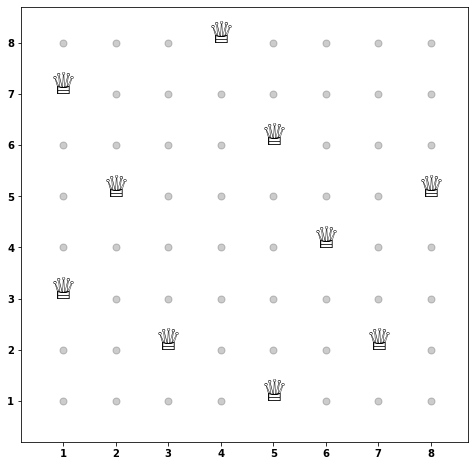

In [6]:
instance = model.create_instance()  
instance.C3.activate()
instance.C1.deactivate()
instance.C2.deactivate()
instance.C4.deactivate()
instance.C5.deactivate()
instance.attack_limit = 1
opt = SolverFactory('cbc')
results = opt.solve(instance) # solves and updates instance
from pyomo.opt import SolverStatus, TerminationCondition
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
     print ("this is feasible and optimal")
elif results.solver.termination_condition == TerminationCondition.infeasible:
     print ("do something about it? or exit?")
else:
     print ('ERROR ' + str(results.solver))
print(f"OF = {value(instance.obj1)} ")

plt.figure(figsize=(8,8))
record_distance = {}
for j in instance.j:
    for i in instance.i:
        if value(instance.U[i,j]) >0:
            x, y = i, j 
            plt.scatter(x,y, s=0 , c='k')
            plt.text(x-0.25,y, s = '\u2655', fontsize=30 , c= 'k')
        else:
            x, y = i, j 
            plt.scatter(x,y, s=50 , c='k', alpha = 0.2)

plt.xlim(0.2, N+0.7)
plt.ylim(0.2, N+0.7)
plt.xticks(fontweight='bold' , c= 'k')
plt.yticks(fontweight='bold' , c= 'k')

plt.show()

this is feasible and optimal
Limit = 1 , OF = 10.0 


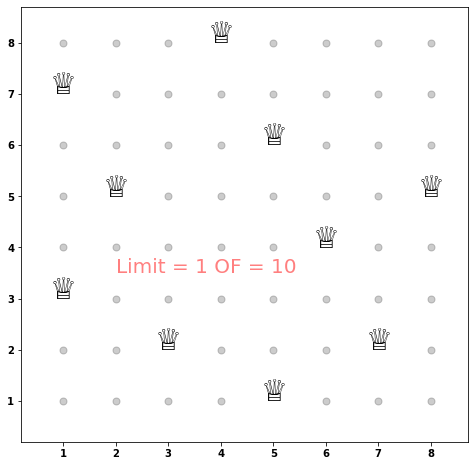

this is feasible and optimal
Limit = 2 , OF = 13.0 


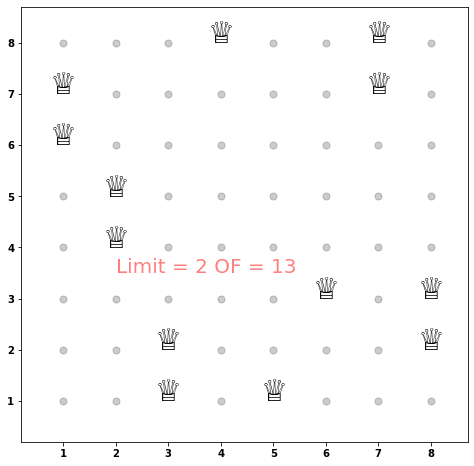

this is feasible and optimal
Limit = 3 , OF = 15.0 


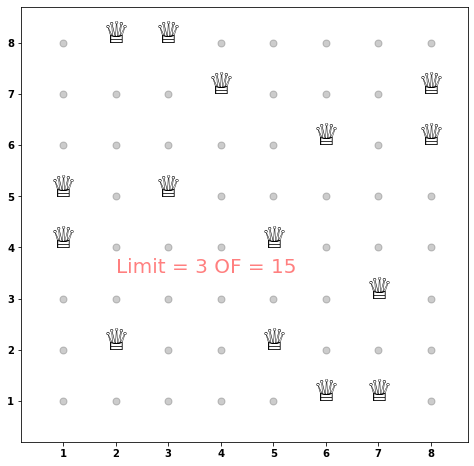

this is feasible and optimal
Limit = 4 , OF = 18.0 


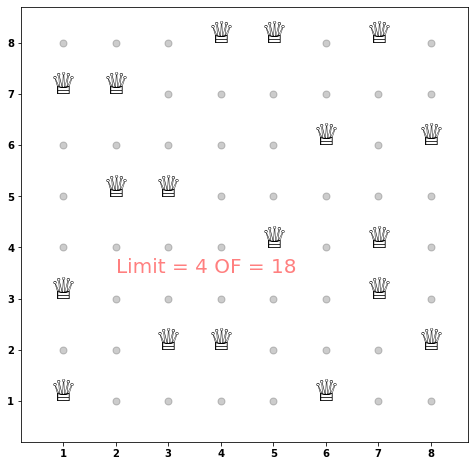

this is feasible and optimal
Limit = 5 , OF = 21.0 


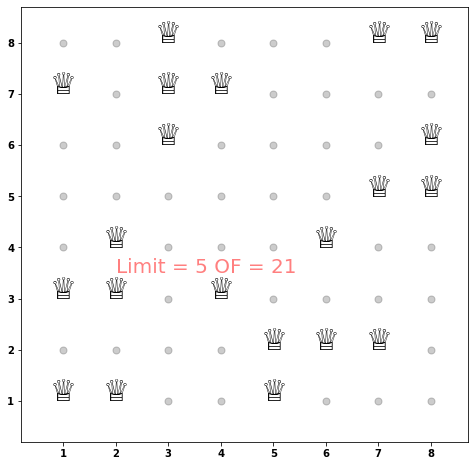

In [11]:
instance = model.create_instance()  
instance.C3.activate()
instance.C1.deactivate()
instance.C2.deactivate()
instance.C4.deactivate()
instance.C5.deactivate()
for lim in range(1,6):
    instance.attack_limit = lim
    results = opt.solve(instance) # solves and updates instance
    from pyomo.opt import SolverStatus, TerminationCondition
    if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
         print ("this is feasible and optimal")
    elif results.solver.termination_condition == TerminationCondition.infeasible:
         print ("do something about it? or exit?")
    else:
         print ('ERROR ' + str(results.solver))
    print(f"Limit = {lim} , OF = {value(instance.obj1)} ")

    plt.figure(figsize=(8,8))
    record_distance = {}
    for j in instance.j:
        for i in instance.i:
            if value(instance.U[i,j]) >0:
                x, y = i, j 
                plt.scatter(x,y, s=0 , c='k')
                plt.text(x-0.25,y, s = '\u2655', fontsize=30 , c= 'k')
            else:
                x, y = i, j 
                plt.scatter(x,y, s=50 , c='k', alpha = 0.2)

    plt.xlim(0.2, N+0.7)
    plt.ylim(0.2, N+0.7)
    plt.xticks(fontweight='bold' , c= 'k')
    plt.yticks(fontweight='bold' , c= 'k')
    plt.text(N/2-2,N/2-0.5, s = 'Limit = ' + str(int(lim))+  ' OF = ' + str(int(value(instance.obj1))) , fontsize=20 , c= 'r', alpha=0.5)
    plt.savefig(' Chess lim ' + str(int(lim))+  ' .png', format='png', dpi=300)

    plt.show()

this is feasible and optimal
OF = 5.0 


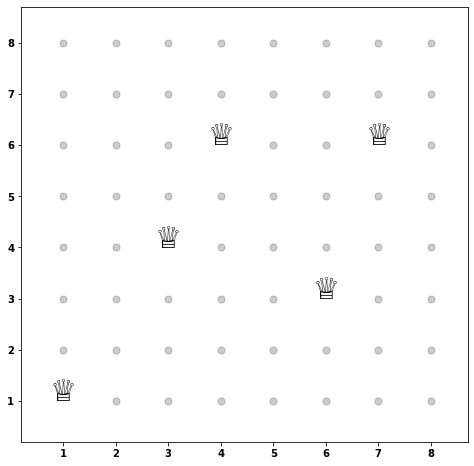

this is feasible and optimal
OF = 5.0 


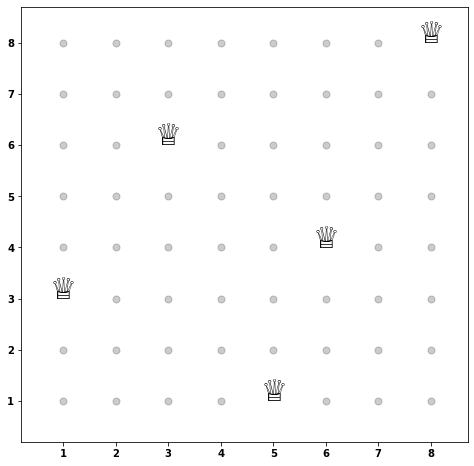

In [16]:
# We are allowed to define how many of the data lines can be used as the training set 
n = N 
model = AbstractModel()

model.i = RangeSet(n)
model.j = Set(initialize = model.i)

model.attack_limit = Param(initialize = 0, mutable= True)

model.U = Var(model.i,model.j, within= Binary)

def rule_c1(model,i):
    return  sum(model.U[i,j] for j in model.j) <= 1
model.C1 = Constraint(model.i, rule=rule_c1)   


def rule_c2(model,j):
    return  sum(model.U[i,j] for i in model.i) <= 1
model.C2 = Constraint(model.i, rule=rule_c2) 

def rule_c3(model,i,j):
    return  sum(model.U[i,m] for m in model.j if j!=m) + sum(model.U[n,j] for n in model.i if i!=n) +  sum(model.U[n,m] for n in model.i for m in model.j if abs(m-j)==abs(n-i) and m!=j and n!=i ) + model.U[i,j] >= 1 
model.C3 = Constraint(model.i,model.j, rule=rule_c3) 


def rule_c4(model,i,j):
    return sum(model.U[n,m] for n in model.i for m in model.j if (m-j)==(n-i) and m!=j and n!=i ) + model.U[i,j]  <= 1 
model.C4 = Constraint(model.i,model.j, rule=rule_c4)   
def rule_c5(model,i,j):
    return sum(model.U[n,m] for n in model.i for m in model.j if (m-j)==-(n-i) and m!=j and n!=i ) + model.U[i,j]  <= 1 
model.C5 = Constraint(model.i,model.j, rule=rule_c5)   


def rule_OF(model):
    return  sum(model.U[i,j] for j in model.j for i in model.i)
model.obj1 = Objective(rule=rule_OF, sense=minimize)
instance = model.create_instance()  

instance.C1.deactivate()
instance.C2.deactivate()
opt = SolverFactory('cbc')
results = opt.solve(instance) # solves and updates instance
from pyomo.opt import SolverStatus, TerminationCondition
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
     print ("this is feasible and optimal")
elif results.solver.termination_condition == TerminationCondition.infeasible:
     print ("do something about it? or exit?")
else:
     print ('ERROR ' + str(results.solver))
print(f"OF = {value(instance.obj1)} ")

plt.figure(figsize=(8,8))
record_distance = {}
for j in instance.j:
    for i in instance.i:
        if value(instance.U[i,j]) >0:
            x, y = i, j 
            plt.scatter(x,y, s=0 , c='k')
            plt.text(x-0.25,y, s = '\u2655', fontsize=30 , c= 'k')
        else:
            x, y = i, j 
            plt.scatter(x,y, s=50 , c='k', alpha = 0.2)

plt.xlim(0.2, N+0.7)
plt.ylim(0.2, N+0.7)
plt.xticks(fontweight='bold' , c= 'k')
plt.yticks(fontweight='bold' , c= 'k')
plt.savefig(' Min Coverage with attack' +  ' .png', format='png', dpi=300)

plt.show()



instance.C1.activate()
instance.C2.activate()
opt = SolverFactory('cbc')
results = opt.solve(instance) # solves and updates instance
from pyomo.opt import SolverStatus, TerminationCondition
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
     print ("this is feasible and optimal")
elif results.solver.termination_condition == TerminationCondition.infeasible:
     print ("do something about it? or exit?")
else:
     print ('ERROR ' + str(results.solver))
print(f"OF = {value(instance.obj1)} ")

plt.figure(figsize=(8,8))
record_distance = {}
for j in instance.j:
    for i in instance.i:
        if value(instance.U[i,j]) >0:
            x, y = i, j 
            plt.scatter(x,y, s=0 , c='k')
            plt.text(x-0.25,y, s = '\u2655', fontsize=30 , c= 'k')
        else:
            x, y = i, j 
            plt.scatter(x,y, s=50 , c='k', alpha = 0.2)

plt.xlim(0.2, N+0.7)
plt.ylim(0.2, N+0.7)
plt.xticks(fontweight='bold' , c= 'k')
plt.yticks(fontweight='bold' , c= 'k')
plt.savefig(' Min Coverage without attack' +  ' .png', format='png', dpi=300)

plt.show()
